In [15]:
import pandas as pd
import matplotlib.pyplot as plt

In [117]:
filename="chain_mk1_maxDist3_nEndo5_k10_1_mIter500_wtrue_sparents3_x50_0.csv"
#filename = "chain_mk1_maxDist3_nEndo5_k10_1_mIter2000_wtrue_sparents3_x10_0.csv"
#filename = "chain_mk1_maxDist3_nEndo5_k05_3_mIter500_wtrue_sparents3_x50_0.csv"   # small interval
#filename = "chain_mk1_maxDist3_nEndo5_k05_3_mIter2000_wtrue_sparents3_x10_0.csv"
data = pd.read_csv(f"results/{filename}")
data

,method,ace_l,pns_u,selector,ace_u,pns_l,model_path,ps1,time_pns,time_ace,time_learn,n_convergence
0,exact,-0.000261,0.019317,False,-0.000261,0.000201,papers/pgm22/models/synthetic/1000/set3/chain_...,1.000,NaN,NaN,NaN,NaN
1,exact_data_based,0.000059,0.026544,False,0.000059,0.000097,papers/pgm22/models/synthetic/1000/set3/chain_...,1.000,NaN,NaN,NaN,NaN
2,EMCC,0.000058,0.024284,False,0.000063,0.000253,papers/pgm22/models/synthetic/1000/set3/chain_...,1.000,153.0,53.0,106507.0,40.0
3,EMCC,-0.194255,0.536341,True,0.466020,0.000014,papers/pgm22/models/synthetic/1000/set3/chain_...,0.000,27.0,19.0,376.0,43.0
4,EMCC,-0.298144,0.538144,True,0.464291,0.000007,papers/pgm22/models/synthetic/1000/set3/chain_...,0.023,31.0,9.0,26821.0,43.0
5,EMCC,-0.007743,0.031017,True,0.015378,0.000059,papers/pgm22/models/synthetic/1000/set3/chain_...,0.267,34.0,13.0,67000.0,22.0
6,EMCC,-0.001393,0.020742,True,0.002882,0.000391,papers/pgm22/models/synthetic/1000/set3/chain_...,0.317,25.0,26.0,97812.0,22.0
7,EMCC,-0.001584,0.021441,True,0.000750,0.000393,papers/pgm22/models/synthetic/1000/set3/chain_...,0.346,22.0,14.0,127665.0,22.0
8,EMCC,-0.001007,0.015910,True,-0.000544,0.000866,papers/pgm22/models/synthetic/1000/set3/chain_...,0.421,21.0,7.0,169547.0,2.0
9,EMCC,-0.000744,0.020153,True,-0.000524,0.000888,papers/pgm22/models/synthetic/1000/set3/chain_...,0.603,25.0,11.0,205075.0,22.0


In [142]:
def plot_evolution(data, ylim=None):
    df = data[["method", "pns_u","pns_l","selector","ps1"]]
    pns_exact_data = df.loc[(df.method=="exact_data_based"), [ "pns_l", "pns_u"]].values[0]
    pns_exact= df.loc[(df.method=="exact"), [ "pns_l", "pns_u"]].values[0]
    print(f"pns_exact_data: {pns_exact_data}")
    print(f"pns_exact: {pns_exact}")
    pns_sbias = df.loc[(df.method=="EMCC") & (df.selector==True)].sort_values(by="ps1")[["ps1", "pns_l", "pns_u"]]
    pns_sbias = df.loc[(df.method=="EMCC") & (df.selector==True)].sort_values(by="ps1")[["ps1", "pns_l", "pns_u"]]

    plt.axhline(y=pns_exact_data[0], color='black', linewidth=1, label="pns exact bounds (data-based)")
    plt.axhline(y=pns_exact_data[1], color='black', linewidth=1)

    plt.axhline(y=pns_exact[0], color='grey', linestyle='--', linewidth=1, label="pns exact bounds (model-based)")
    plt.axhline(y=pns_exact[1], color='grey', linestyle='--', linewidth=1)


    plt.plot(pns_sbias.ps1, pns_sbias.pns_u, label="pns_u", marker="x")
    plt.plot(pns_sbias.ps1, pns_sbias.pns_l, label="pns_l", marker="x" )


    plt.ylabel("PNS")
    plt.xlabel("P(S=1)")

    plt.legend()
    if ylim is not None: plt.ylim(ylim)
    #plt.ylim([-0.01, 0.6])
    #plt.ylim([-0.01, 0.1])
    #plt.ylim([0.001, 0.01])

    plt.show()

    return pns_sbias


pns_exact_data: [9.65413875e-05 2.65439448e-02]
pns_exact: [0.00020064 0.01931742]


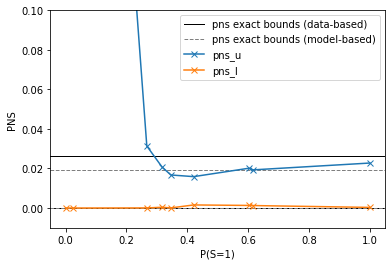

,ps1,pns_l,pns_u
3,0.000,0.000014,0.536341
4,0.023,0.000007,0.538144
5,0.267,0.000058,0.031376
6,0.317,0.000391,0.020755
7,0.346,0.000061,0.016724
8,0.421,0.001562,0.015886
9,0.603,0.001314,0.020149
10,0.615,0.001260,0.019296
11,1.000,0.000316,0.022764


In [150]:
filename = "chain_mk1_maxDist3_nEndo5_k10_1_mIter2000_wtrue_sparents3_x50_0.csv"
data = pd.read_csv(f"results/{filename}")
plot_evolution(data, ylim = [-0.01, 0.1])

pns_exact_data: [0.00799959 0.00799959]
pns_exact: [0.00492544 0.00492544]


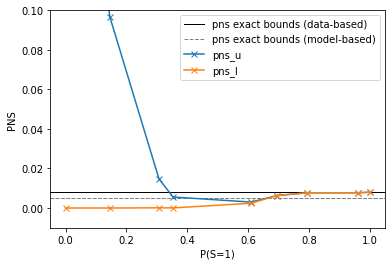

,ps1,pns_l,pns_u
3,0.000,0.000021,0.255352
4,0.146,0.000011,0.096444
5,0.307,0.000113,0.014747
6,0.353,0.000069,0.005576
7,0.609,0.002403,0.003017
8,0.695,0.006323,0.006323
9,0.794,0.007720,0.007720
10,0.962,0.007728,0.007728
11,1.000,0.007999,0.007999


In [145]:
filename = "chain_mk1_maxDist3_nEndo5_k05_3_mIter2000_wtrue_sparents3_x10_0.csv"
data = pd.read_csv(f"results/{filename}")
plot_evolution(data, ylim = [-0.01, 0.1])